In [ ]:
#using percentile method to resolve outlier  related problems


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=sns.load_dataset('titanic')

In [3]:
df.sample(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
115,0,3,male,21.00,0,0,7.925,S,Third,man,True,NaN,Southampton,no,True
587,1,1,male,60.00,1,1,79.200,C,First,man,True,B,Cherbourg,yes,False
755,1,2,male,0.67,1,1,14.500,S,Second,child,False,NaN,Southampton,yes,False
397,0,2,male,46.00,0,0,26.000,S,Second,man,True,NaN,Southampton,no,True
253,0,3,male,30.00,1,0,16.100,S,Third,man,True,NaN,Southampton,no,False


In [4]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [5]:
new_df=df.drop(columns=[
     'age', 'sibsp', 'parch',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', ])

In [6]:
new_df.sample()

,survived,pclass,sex,fare,alone
487,0,1,male,29.7,True


<Axes: xlabel='fare'>

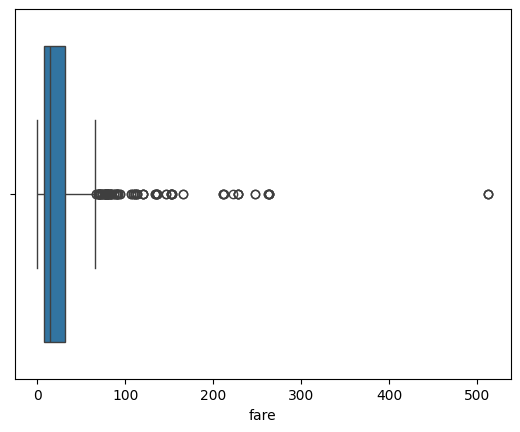

In [8]:
sns.boxplot(x=new_df['fare'])

<ipython-input-33-7265c83966ac>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['fare'])


<Axes: xlabel='fare', ylabel='Density'>

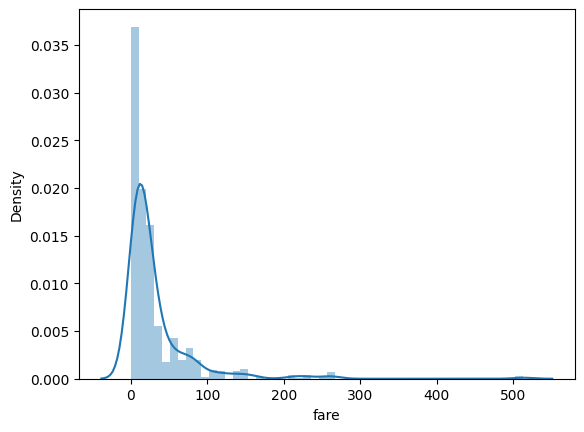

In [33]:
sns.distplot(new_df['fare'])

In [12]:
upperlimit=new_df['fare'].quantile(0.90)
lowerlimit=new_df['fare'].quantile(0.05)

In [15]:
#trimminig
new_1=new_df[(new_df['fare']<upperlimit) & (new_df['fare']>lowerlimit)]

<Axes: xlabel='fare'>

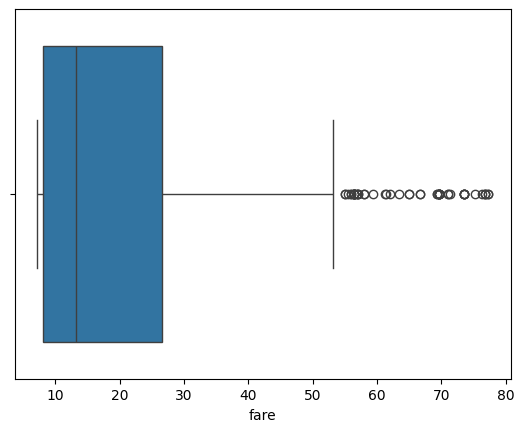

In [14]:
sns.boxplot(x=new_1['fare'])

<ipython-input-32-6247a567a9a9>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_1['fare'])


<Axes: xlabel='fare', ylabel='Density'>

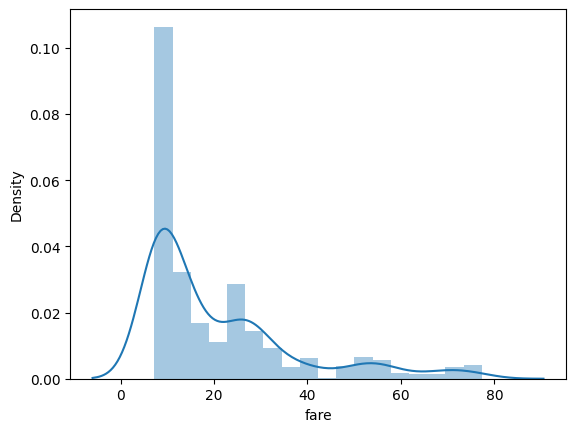

In [32]:
sns.distplot(new_1['fare'])

<Axes: xlabel='fare'>

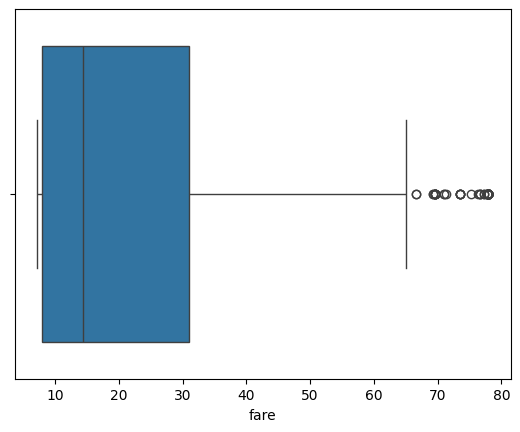

In [27]:
#capping
new2=new_df.copy()  # Create a copy of the DataFrame
new2['fare']=np.where(new_df['fare']>upperlimit,upperlimit,
              np.where(new_df['fare']<lowerlimit,lowerlimit, new_df['fare']))


sns.boxplot(x=new2['fare'])

<ipython-input-31-dd8680af457d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new2['fare'])


<Axes: xlabel='fare', ylabel='Density'>

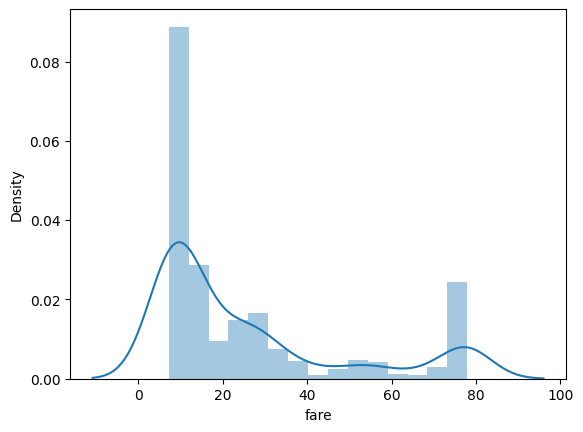

In [31]:
sns.distplot(new2['fare'])

In [34]:
#replacing outlier with mean
mean=new_1['fare'].mean()
mean

20.660354691689008

In [28]:
new_3=new_df.copy()
new_3['fare']=np.where(new_df['fare']>upperlimit,mean,
              np.where(new_df['fare']<lowerlimit,mean, new_df['fare']))

<Axes: ylabel='fare'>

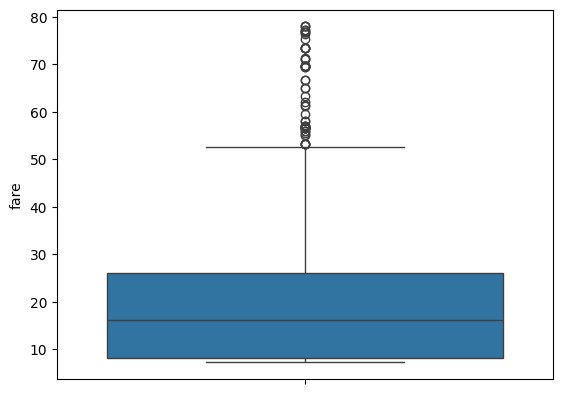

In [29]:
sns.boxplot(new_3['fare'])

<ipython-input-30-00bd4f3c7d46>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_3['fare'])


<Axes: xlabel='fare', ylabel='Density'>

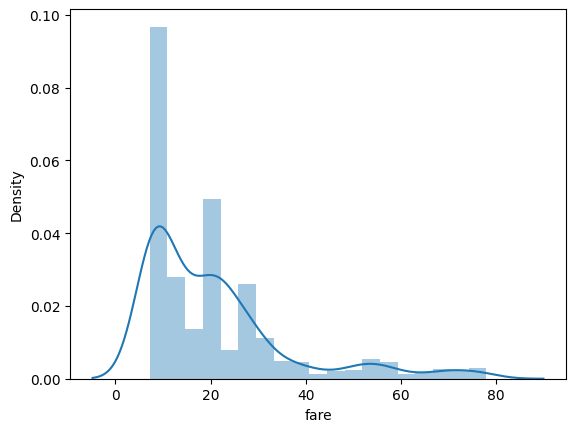

In [30]:
sns.distplot(new_3['fare'])